## Monte Carlo simulation of Hard sphere model

Let's plot the radial distribution function $g(r)$ for various densities:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import os 
plt.style.use('science')

Verify that the code is stable and give stable results (one set of beta + swap rates). Produce equilibrated configurations at a given β:

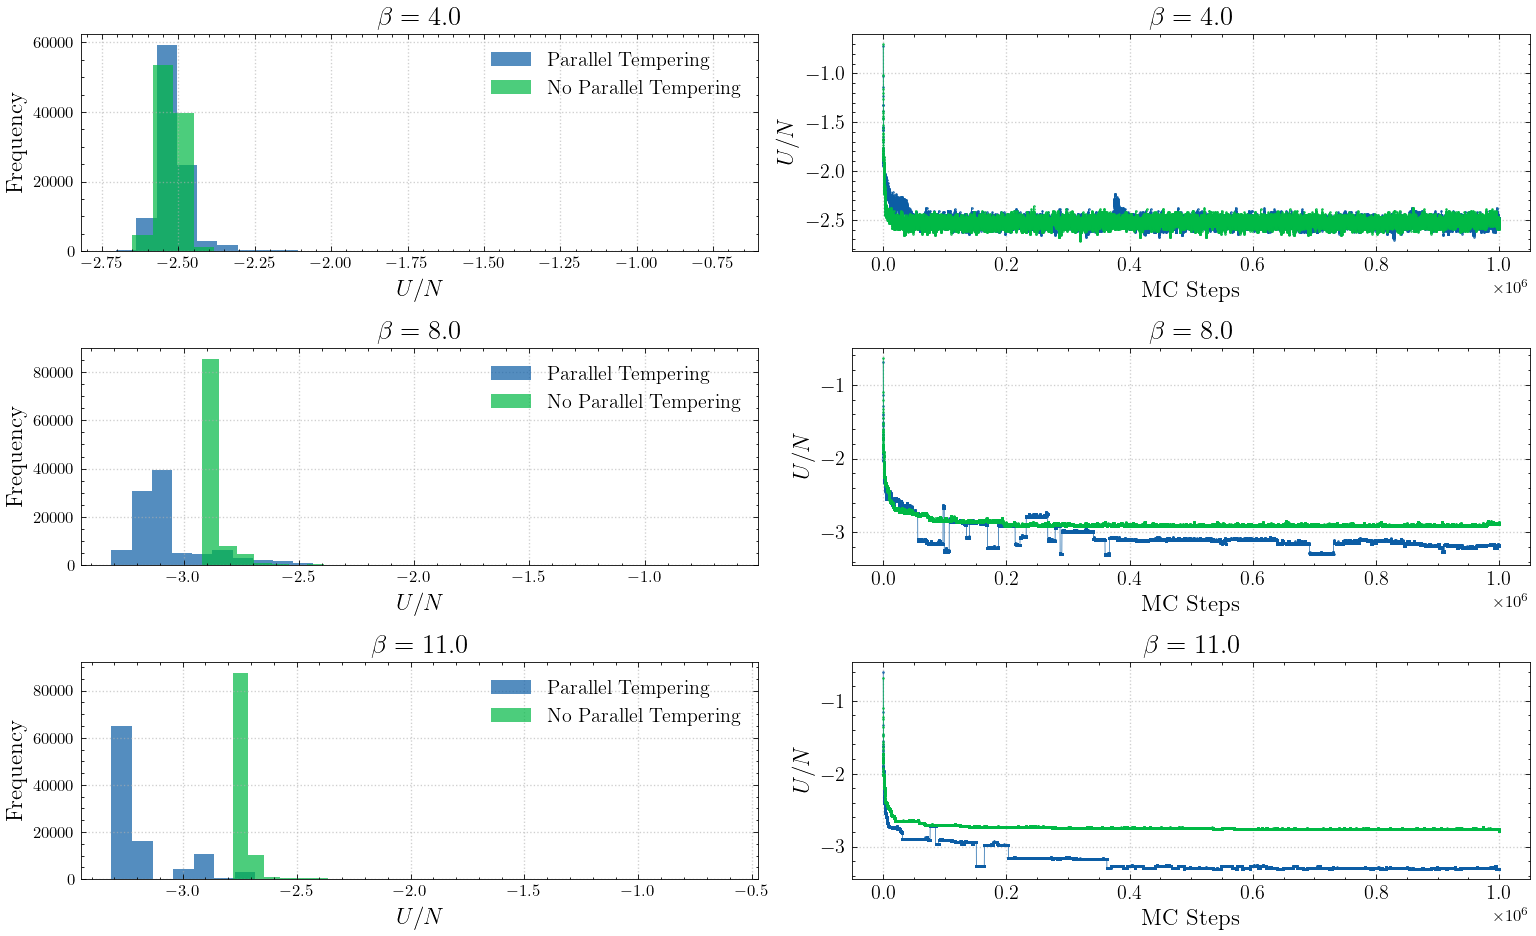

In [ ]:
# Energy analysis
data = np.loadtxt('./data/energy_beta4.000000.dat')
dataNoSwap = np.loadtxt('./data/energy_beta4.000000_noSwap.dat')
# Create a figure with two plots: histogram and line plot
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(13, 8), dpi=120)
ax1.set_title(r'$\beta = 4.0$', fontsize=16)
plt.set_title(r'$\beta = 4.0$', fontsize=16)
ax1.hist(data[:,1], bins = 30, alpha=0.7, label=r'Parallel Tempering')
ax1.hist(dataNoSwap[:,1], bins = 30, alpha=0.7, label=r'No Parallel Tempering')
ax1.set_xlabel(r'$U/N$', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
ax1.legend(framealpha=0.9, fontsize=12)
ax2.plot(data[:,0], data[:,1], marker = "o", markersize=0.5, linestyle='-', linewidth=0.4)
ax2.plot(dataNoSwap[:,0], dataNoSwap[:,1], marker = "o", markersize=0.5, linestyle='-', linewidth=0.4)
ax2.set_xlabel('MC Steps', fontsize=14)
ax2.set_ylabel(r'$U/N$', fontsize=14)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)

data = np.loadtxt('./data/energy_beta8.000000.dat')
dataNoSwap = np.loadtxt('./data/energy_beta8.000000_noSwap.dat')
ax3.hist(data[:,1], bins = 30, alpha=0.7, label=r'Parallel Tempering')
ax3.set_title(r'$\beta = 8.0$', fontsize=16)
ax4.set_title(r'$\beta = 8.0$', fontsize=16)
ax3.hist(dataNoSwap[:,1], bins = 30, alpha=0.7, label=r'No Parallel Tempering')
ax3.set_xlabel(r'$U/N$', fontsize=14)
ax3.set_ylabel('Frequency', fontsize=14)
ax3.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
ax3.legend(framealpha=0.9, fontsize=12)
ax4.plot(data[:,0], data[:,1], marker = "o", markersize=0.5, linestyle='-', linewidth=0.4)
ax4.plot(dataNoSwap[:,0], dataNoSwap[:,1], marker = "o", markersize=0.5, linestyle='-', linewidth=0.4)
ax4.set_xlabel('MC Steps', fontsize=14)
ax4.set_ylabel(r'$U/N$', fontsize=14)
ax4.tick_params(axis='x', labelsize=12)
ax4.tick_params(axis='y', labelsize=12)
ax4.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)

data = np.loadtxt('./data/energy_beta11.000000.dat')
dataNoSwap = np.loadtxt('./data/energy_beta11.000000_noSwap.dat')

ax5.hist(data[:,1], bins = 30, alpha=0.7, label=r'Parallel Tempering')
ax5.set_title(r'$\beta = 11.0$', fontsize=16)
ax6.set_title(r'$\beta = 11.0$', fontsize=16)
ax5.hist(dataNoSwap[:,1], bins = 30, alpha=0.7, label=r'No Parallel Tempering')
ax5.set_xlabel(r'$U/N$', fontsize=14)
ax5.set_ylabel('Frequency', fontsize=14)
ax5.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
ax5.legend(framealpha=0.9, fontsize=12)
ax6.plot(data[:,0], data[:,1], marker = "o", markersize=0.5, linestyle='-', linewidth=0.4)
ax6.plot(dataNoSwap[:,0], dataNoSwap[:,1], marker = "o", markersize=0.5, linestyle='-', linewidth=0.4)
ax6.set_xlabel('MC Steps', fontsize=14)
ax6.set_ylabel(r'$U/N$', fontsize=14)
ax6.tick_params(axis='x', labelsize=12)
ax6.tick_params(axis='y', labelsize=12)
ax6.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)

plt.tight_layout()
#plt.savefig('/home/lrizzi17/NumericalMethods/tex2/FIG/Energy_Histograms_LowT.pdf', dpi=120)
plt.show()

Measure the energy and specific heat:

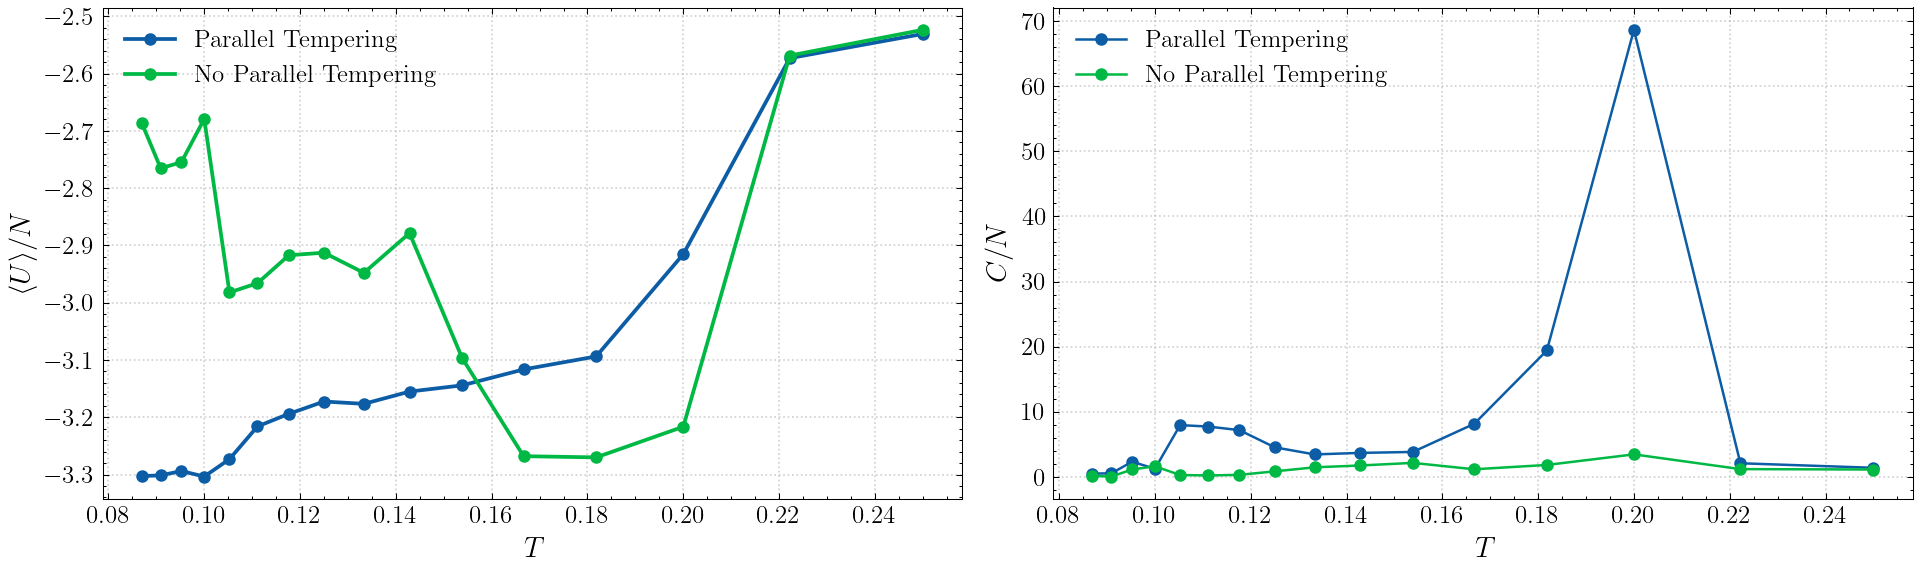

In [3]:
beta = [1.,   1.05, 1.2,  1.25, 1.4,  1.45, 1.6,  1.65, 1.8,  1.85, 2.,   2.05, 2.2,  2.25, 2.4,  2.45]
beta = [11.5, 11, 10.5, 10, 9.5, 9, 8.5, 8, 7.5, 7, 6.5, 6, 5.5, 5, 4.5, 4] 
deltaTemp = np.array(beta[1:]) - np.array(beta[:-1])

plt.figure(figsize=(13, 4), dpi=150)
average_energies = []
variance_energies = []
average_energies_noSwap = []
variance_energies_noSwap = []

burnin = 80000
for t in beta:
    data = np.loadtxt(f'./data/energy_beta{t:.6f}.dat')
    data_noSwap = np.loadtxt(f'./data/energy_beta{t:.6f}_noSwap.dat')
    average_energy = np.mean(data[burnin:,1])
    variance_energy = 64* np.var(data[burnin:,1]) * (t*t)
    average_energy_noSwap = np.mean(data_noSwap[burnin:,1])
    variance_energy_noSwap = 64* np.var(data_noSwap[burnin:,1]) * (t*t)
    average_energies.append(average_energy)
    variance_energies.append(variance_energy)
    average_energies_noSwap.append(average_energy_noSwap)
    variance_energies_noSwap.append(variance_energy_noSwap)

temperatures = [1./float(x) for x in beta]
plt.subplot(1, 2, 1)
plt.plot(temperatures, average_energies, marker = "o", markersize=5, linestyle='-', linewidth=1.8, label ='Parallel Tempering')
plt.plot(temperatures, average_energies_noSwap, marker = "o", markersize=5, linestyle='-', linewidth=1.8, label ='No Parallel Tempering')
plt.xlabel(r'$T$', fontsize=14)
plt.ylabel(r'$\langle U \rangle / N$', fontsize=14)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
plt.tight_layout()
plt.legend(framealpha=0.9, fontsize=12)
plt.subplot(1, 2, 2)
plt.plot(temperatures, variance_energies, marker = "o", markersize=5, linestyle='-', linewidth=1.2, label = "Parallel Tempering")
plt.plot(temperatures, variance_energies_noSwap, marker = "o", markersize=5, linestyle='-', linewidth=1.2, label = "No Parallel Tempering")
plt.xlabel('$T$', fontsize=14)
plt.ylabel('$C / N$', fontsize=14)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
plt.legend(framealpha=0.9, fontsize=12)
plt.tight_layout()
#plt.savefig('/home/lrizzi17/NumericalMethods/tex2/FIG/Energy_SpecificHeat_LowT.pdf', dpi=300)
plt.show()

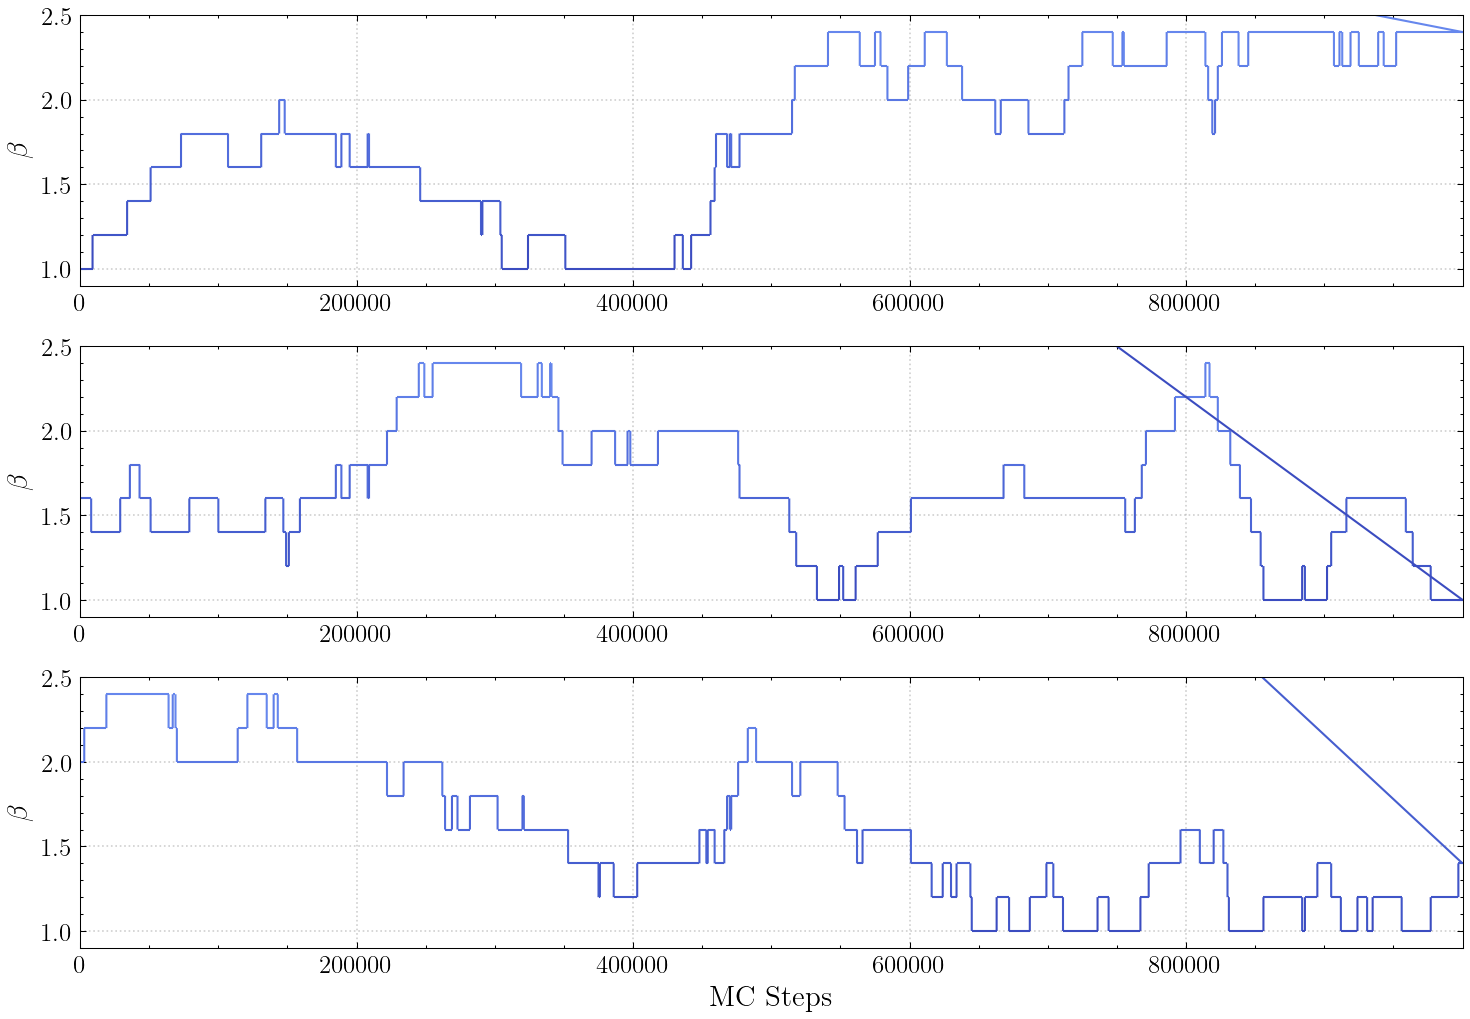

In [4]:
from matplotlib.collections import LineCollection

plt.figure(figsize=(10, 7), dpi=150)

datasets = []
y_vals = []
for idx in [0, 3, 5]:
    d = np.loadtxt(f'./data/Path{idx}.dat')
    y = 1 / d[:, 1]
    datasets.append((idx, d[:, 0], y))
    y_vals.append(y)

ymin, ymax = np.min(np.concatenate(y_vals)), np.max(np.concatenate(y_vals))
norm = plt.Normalize(ymin, ymax)
cmap = plt.cm.coolwarm 

for plot_idx, (temp_idx, x, y) in enumerate(datasets, start=1):
    ax = plt.subplot(3, 1, plot_idx)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cmap, norm=norm, alpha=1, linewidth=2.5)
    lc.set_array(y[:-1])
    lc.set_linewidth(1)
    ax.add_collection(lc)
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(0.9, 2.5)
    ax.set_ylabel(r'$\beta$', fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
    if plot_idx == 3:
        ax.set_xlabel('MC Steps', fontsize=14)

plt.tight_layout()
#plt.savefig('/home/lrizzi17/NumericalMethods/tex2/FIG/TemperaturePaths.pdf', dpi=300)
plt.show()

## Multiple histogram method

Let us first compute the values $N_k(E)$. Since the simulation is discrete, we will bin the energy interval too as to obtain $N_k(E_i)$, where $1 < k < K$ refers to the chain id and $1<i< n_{bin}$ to the bin index within a fixed chain

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N_part = 64
beta = [4,5,6,7,8,9,10,11]
beta = [1., 1.2, 1.4, 1.6, 1.8, 2., 2.2, 2.4] 
K = len(beta)

n_bins = 2000  # Number of bins for the global histogram
burnin = 20000 # Rows to discard for equilibration
tol = 1e-8 # Tolerance for convergence
max_iter = 5000  # Iteration limit


energy_data = [] # List of arrays, one for each T
M_k = []         # Number of valid samples for each T (M_k in your formula)

for b in beta:
    raw = np.loadtxt(f'./data/energy_beta{b:.6f}.dat')
    E_total = raw[burnin:, 1] * N_part 
    energy_data.append(E_total)
    M_k.append(len(E_total))

M_k = np.array(M_k)

all_energies = np.concatenate(energy_data)
E_min, E_max = np.min(all_energies), np.max(all_energies)
bins = np.linspace(E_min - 0.1, E_max + 0.1, n_bins + 1)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
n_bins_actual = len(bin_centers)

# Build the histograms N_k(E)
histograms = np.zeros((K, n_bins_actual))
for i in range(K):
    hist, _ = np.histogram(energy_data[i], bins=bins)
    histograms[i, :] = hist

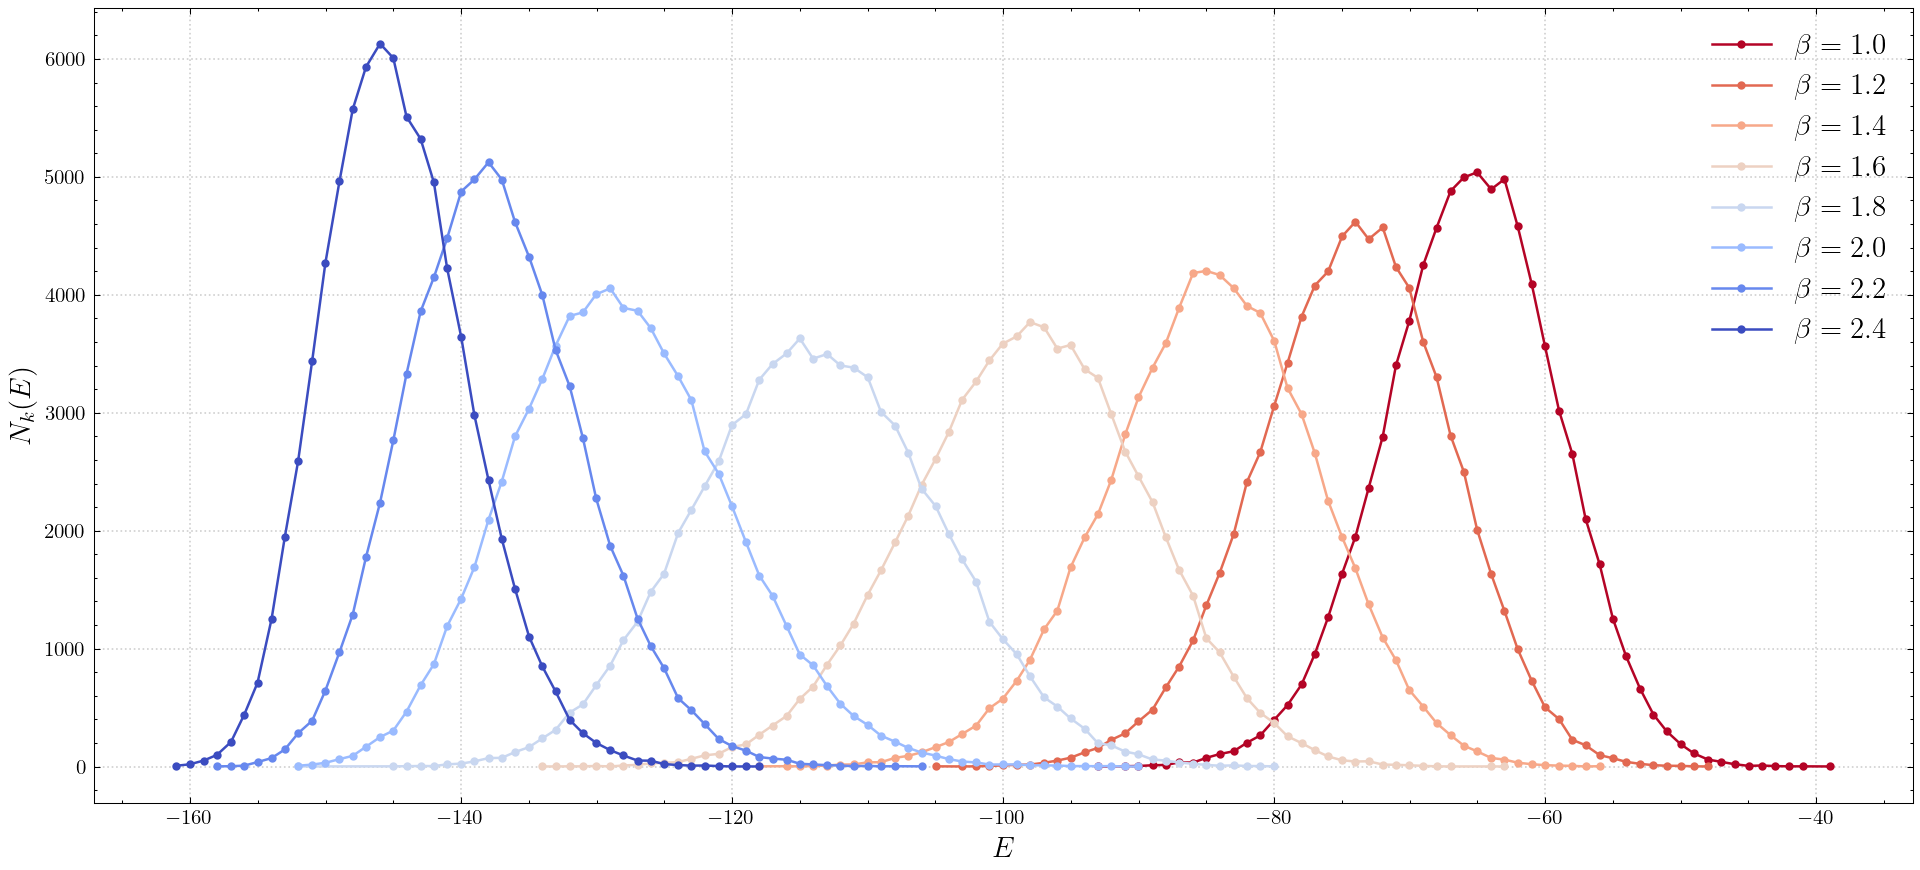

In [141]:
plt.figure(figsize=(13, 6), dpi=150)
colors = plt.cm.coolwarm(np.linspace(0, 1, K))[::-1]
for k in range(K):
    # Most of the bins will be empty, plot only non-zero entries
    nonzero_mask = histograms[k] > 0
    nonzero_histo = histograms[k][nonzero_mask]
    bin_centers_nonzero = bin_centers[nonzero_mask]
    plt.plot(bin_centers_nonzero, nonzero_histo, marker = "o", markersize=3, linestyle='-', linewidth=1.2, label = rf"$\beta={beta[k]:.1f}$", color=colors[k])
plt.xlabel(r'$E$', fontsize=14)
plt.ylabel(r'$N_k(E)$', fontsize=14)
plt.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("/home/lrizzi17/NumericalMethods/tex2/FIG/HistogramsMHM.pdf", dpi = 300)
plt.show()

In [136]:

H_tot = np.sum(histograms, axis=0)
mask = H_tot > 0
E_valid = bin_centers[mask]
H_tot_valid = H_tot[mask]  
nonzero_bins = len(E_valid)

logZ = np.zeros(K) 
log_nu = np.log(H_tot_valid)

for iteration in range(max_iter):
    logZ_new = np.zeros(K)
    
    for k in range(K):
        lambda_kj = np.zeros((K, nonzero_bins))
        for j in range(K):
            const = np.log(M_k[j]) - logZ[j]
            en_term = (beta[k] - beta[j]) * E_valid
            lambda_kj[j, :] = const + en_term
        lambda_kq = np.max(lambda_kj, axis=0) 
        log_denom = lambda_kq + np.log(np.sum(np.exp(lambda_kj - lambda_kq), axis=0))

        log_integrand = log_nu - log_denom
        max_int = np.max(log_integrand)
        logZ_new[k] = max_int + np.log(np.sum(np.exp(log_integrand - max_int)))

    logA = -0.5 * (np.min(logZ_new) + np.max(logZ_new))
    logZ_new += logA


    diff_log = logZ - logZ_new 
    rel_change = 1.0 - np.exp(diff_log)
    delta_sq = np.sum(rel_change**2)
    
    if delta_sq < tol:
        print(f"Converged after {iteration} iterations. Delta: {delta_sq:.2e}")
        logZ = logZ_new
        break
    else:
        logZ = logZ_new.copy()
        if iteration % 100 == 0:
            print(f"Iter {iteration}, Delta: {delta_sq:.2e}")

Iter 0, Delta: 2.78e+29
Iter 100, Delta: 1.01e-04
Converged after 179 iterations. Delta: 9.16e-09


/tmp/ipykernel_5537/2396259678.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'best', fontsize=16)


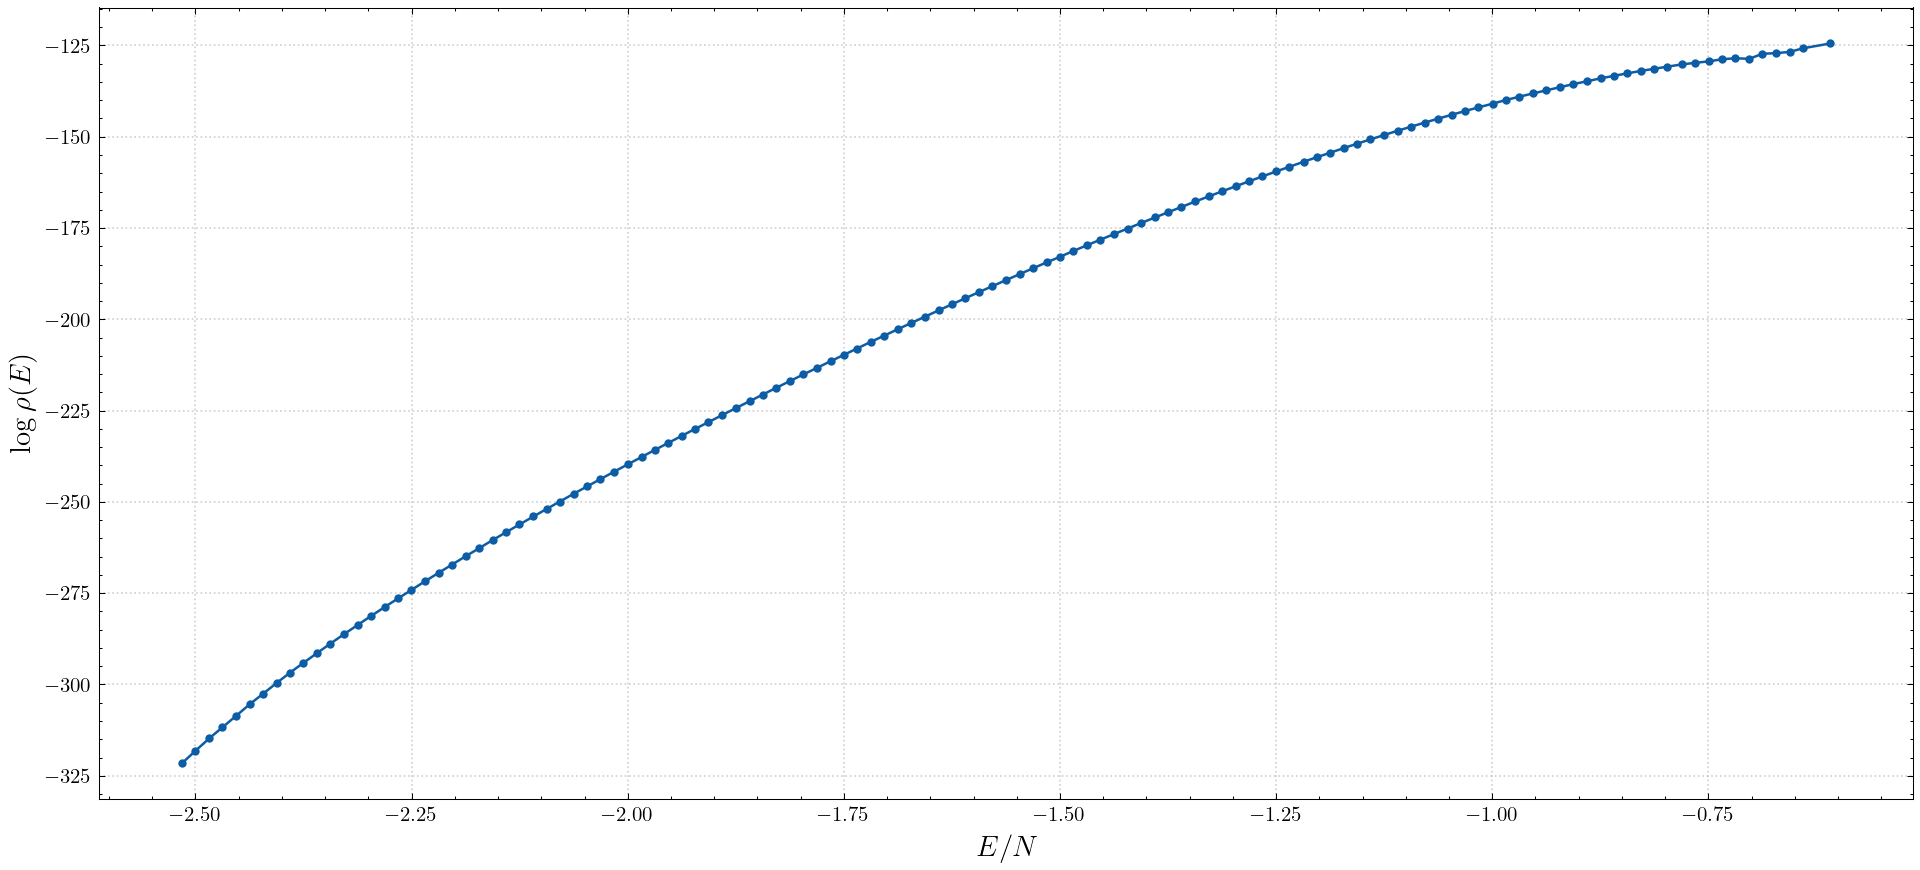

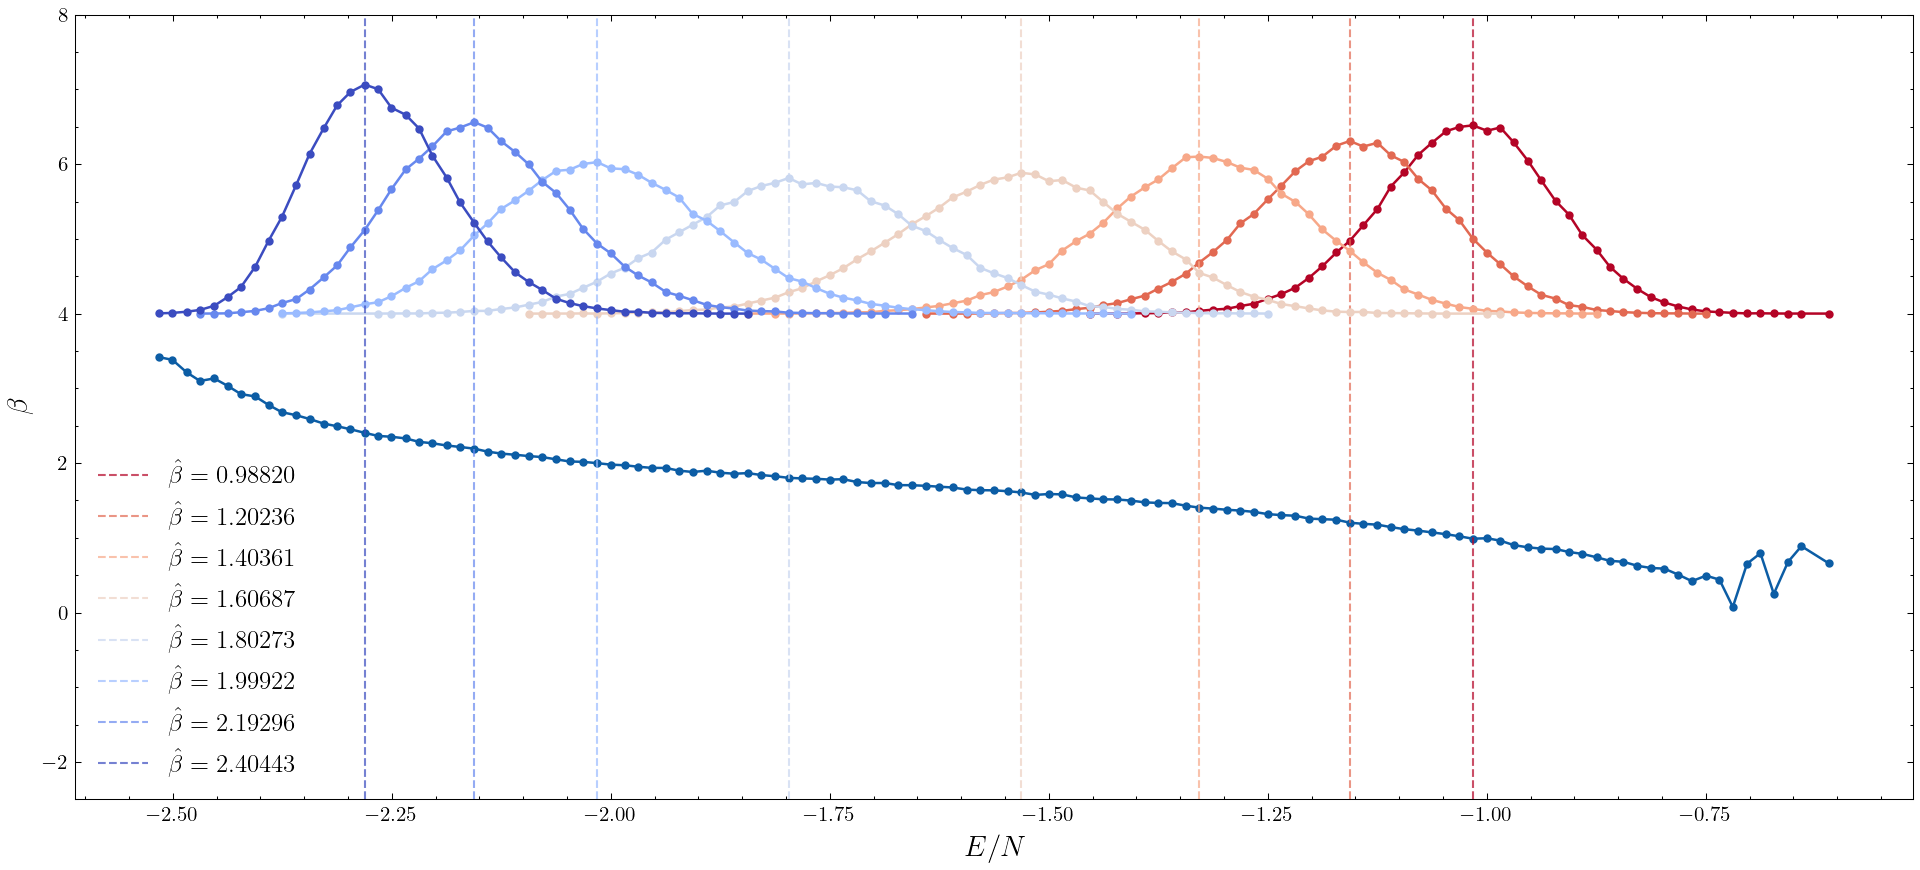

In [145]:
log_numerator = np.log(H_tot_valid)

log_terms_denom = np.zeros((K, nonzero_bins))

for k in range(K):
    log_terms_denom[k, :] = np.log(M_k[k]) - logZ[k] - beta[k] * E_valid
max_denom = np.max(log_terms_denom, axis=0)
log_denominator = max_denom + np.log(np.sum(np.exp(log_terms_denom - max_denom), axis=0))

log_rho = log_numerator - log_denominator

plt.figure(figsize=(13, 6), dpi=150)
plt.plot(E_valid / N_part, log_rho, marker = "o", markersize=3, linestyle='-', linewidth=1.2)
plt.xlabel(r'$E/N$', fontsize=14)
plt.ylabel(r'$\log \rho(E)$', fontsize=14)
plt.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
plt.tight_layout()
plt.savefig("/home/lrizzi17/NumericalMethods/tex2/FIG/Entropy.pdf", dpi = 300)
plt.legend(loc = 'best', fontsize=16)
plt.show()

# Compute numerically the derivative
plt.figure(figsize=(13, 6), dpi=150)
dlogrho_dE = np.gradient(log_rho, E_valid)
plt.plot(E_valid/N_part, dlogrho_dE, marker = "o", markersize=3, linestyle='-', linewidth=1.2)
plt.xlabel(r'$E/N$', fontsize=14)
plt.ylabel(r'$\beta$', fontsize=14)
#plt.grid(True, linestyle=':', linewidth=0.8, alpha=0.6)
for k in range(K):
    # Most of the bins will be empty, plot only non-zero entries
    nonzero_mask = histograms[k] > 0
    nonzero_histo = histograms[k][nonzero_mask]
    bin_centers_nonzero = bin_centers[nonzero_mask]
    plt.plot(bin_centers_nonzero/N_part, nonzero_histo/2000 + 4, marker = "o", markersize=3, linestyle='-', linewidth=1.2, color=colors[k])
    peak = np.max(nonzero_histo/2000)
    binmax = bin_centers_nonzero[np.argmax(nonzero_histo)]/N_part
    index = np.argmin(np.abs(E_valid/N_part - binmax))
    beta_estimated = dlogrho_dE[index]
    plt.axvline(x=binmax, ymin=0, ymax=peak, color=colors[k], linestyle='--', alpha=0.7, label = rf"$\hat{{\beta}}={beta_estimated:.5f}$")
plt.legend(fontsize=12)
plt.ylim(-2.5,8)
plt.tight_layout()
plt.savefig("/home/lrizzi17/NumericalMethods/tex2/FIG/DerivLogDensityMHM.pdf", dpi = 300)
plt.show()  

Now that we have rho(E), we can compute observables at any T

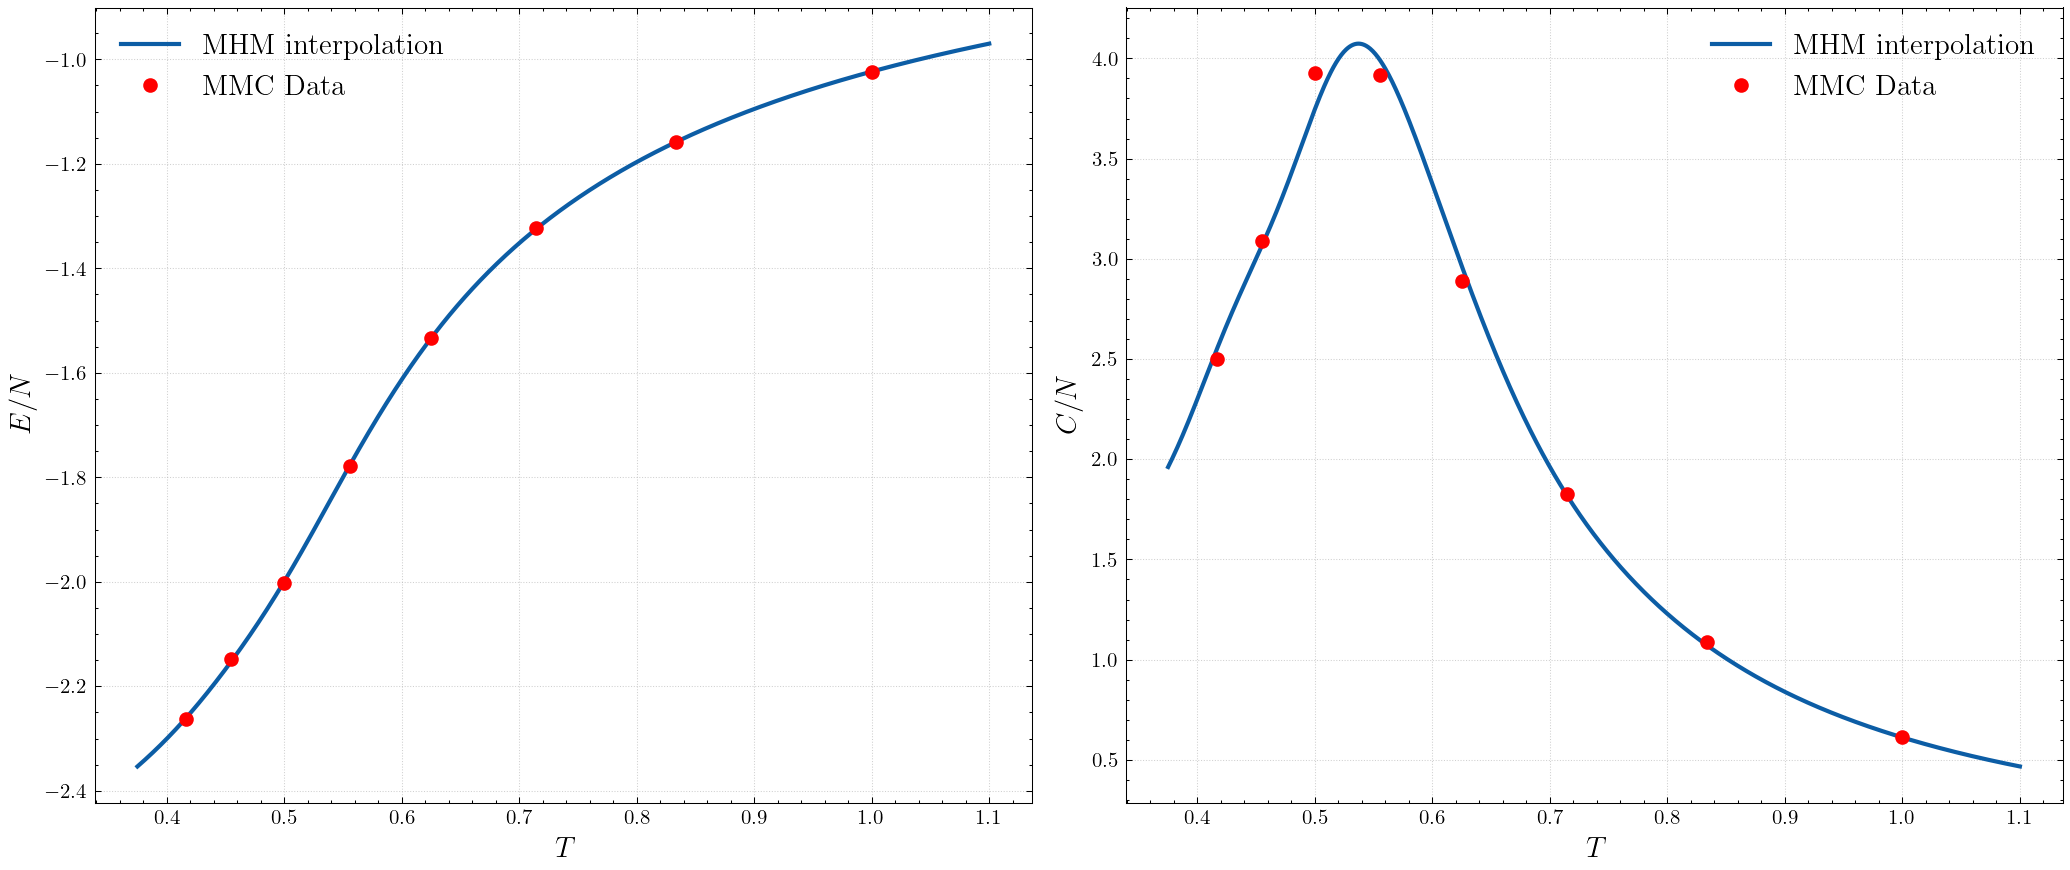

In [171]:
T_min = 1.0 / np.max(beta)
T_max = 1.0 / np.min(beta)
T_continuo = np.linspace(T_min * 0.9, T_max * 1.1, 1000) 

U = []  
Cv = [] 

for T_val in T_continuo:
    beta_val = 1.0 / T_val
    
    # First of all, compute Z(beta)
    log_weights = log_rho - beta_val * E_valid
    # Solito log-sum trick
    max_log_w = np.max(log_weights)
    weights_shifted = np.exp(log_weights - max_log_w)
    
    Z_shifted = np.sum(weights_shifted)

    log_Z = max_log_w + np.log(Z_shifted)
    F_val = - (1.0 / beta_val) * log_Z

    E_avg = np.sum(E_valid * weights_shifted) / Z_shifted
    E2_avg = np.sum((E_valid**2) * weights_shifted) / Z_shifted
    
    U.append(E_avg / N_part)
    
    cv_val = (E2_avg - E_avg**2) / (T_val**2) / N_part
    Cv.append(cv_val)


plt.figure(figsize=(14, 6), dpi=150)
plt.subplot(1, 2, 1)
plt.plot(T_continuo, U, linewidth=2, label='MHM interpolation')
plt.xlabel(r'$T$', fontsize=14)
plt.ylabel(r'$E/N$', fontsize=14)
plt.grid(True, linestyle=':', alpha=0.6)


beta = [1., 1.2, 1.4, 1.6, 1.8, 2., 2.2, 2.4]

deltaTemp = np.array(beta[1:]) - np.array(beta[:-1])
average_energies = []
variance_energies = []
average_energies_noSwap = []
variance_energies_noSwap = []

for t in beta:
    data = np.loadtxt(f'./data/energy_beta{t:.6f}.dat')
    data_noSwap = np.loadtxt(f'./data/energy_beta{t:.6f}_noSwap.dat')
    average_energy = np.mean(data[burnin:,1])
    variance_energy = 64* np.var(data[burnin:,1]) * (t*t)
    average_energy_noSwap = np.mean(data_noSwap[burnin:,1])
    variance_energy_noSwap = 64* np.var(data_noSwap[burnin:,1]) * (t*t)
    average_energies.append(average_energy)
    variance_energies.append(variance_energy)
    average_energies_noSwap.append(average_energy_noSwap)
    variance_energies_noSwap.append(variance_energy_noSwap)
plt.plot(1./np.array(beta), average_energies,'ro', label='MMC Data')
plt.legend(fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(T_continuo, Cv, linewidth=2, label='MHM interpolation')
plt.xlabel(r'$T$', fontsize=14)
plt.ylabel(r'$C/N$', fontsize=14)
plt.grid(True, linestyle=':', alpha=0.6)
plt.plot(1./np.array(beta), variance_energies, 'ro', label='MMC Data')
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("/home/lrizzi17/NumericalMethods/tex2/FIG/Energy_SpecificHeat_MHM.pdf", dpi = 300)
plt.show()